In [71]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, scipy as sp, math, scienceplots
from scipy.optimize import curve_fit
import warnings

# suppress warnings
warnings.filterwarnings('ignore')

In [72]:
plt.style.use(['science', 'nature'])

# 5.1 HIV EXAMPLE

### 5.1.1 Explore the model

First, we create a function for the viral load. The function is defined as follows

$viral\_load = A\exp(-\alpha t) + B\exp(-\beta t)$

In [73]:
def viral_load(t, a, b, alpha, beta):
    return a*math.e**(-alpha*t) + b*math.e**(-beta*t)

### 5.1.2 Fit experimental data

Next, we import the HIV data using pandas' read_scv function. We then extract the time data (captured by the variable 'x_exp'), and the viral load data (captured by the 'y_exp' variable). 

In [74]:
df = pd.read_csv('HIVseries.csv')
x_exp, y_exp = np.array(df.x), np.array(df.y)

We want to use 'scipy.optimize.curve_fit' to optimize the parameters in the 'viral_load' function to find the non-linear least square fit. In this case, we need to pass an extra argument to the curve_fit function. This argument is a guess of what we expect the parameters $A, B, \alpha, \& \beta$ to look like. To accomplish this, we will plot our function with a variety of parameters untill it looks similar to the data.

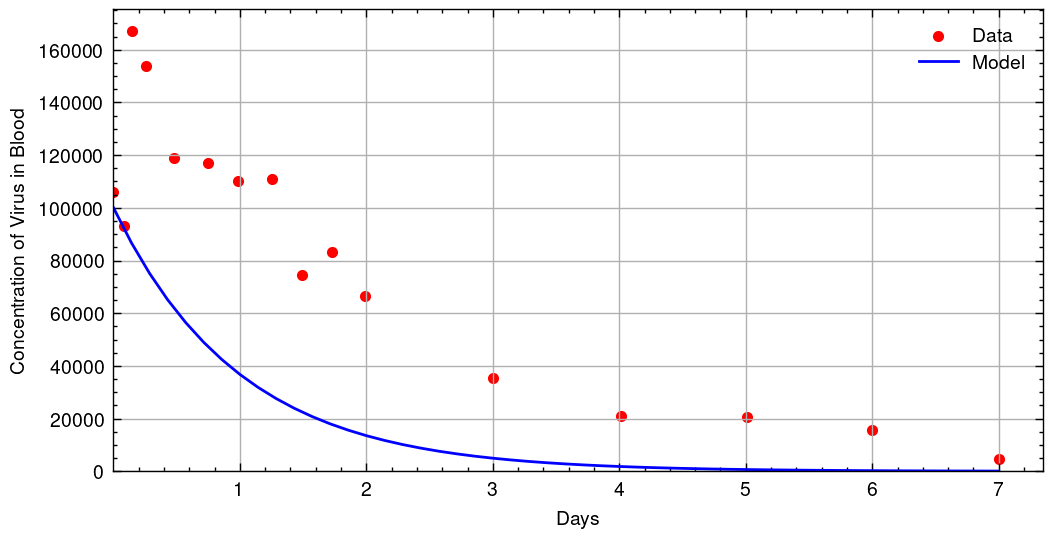

In [80]:
fig, ax = plt.subplots(1,1, figsize=(6,3), dpi=200) # creating a figure 
x_fit = np.linspace(0,7,50) # creating the x values which will be passed to the viral_load function
guess = np.array([100,100000,10,1]) # creats an array which contains the gusses for a, b, alpha & beta
ax.scatter(x_exp, y_exp, color='red', label='Data') # creat a scatter plot to display the HIV data
ax.plot(x_fit, viral_load(x_fit,guess[0],guess[1],guess[2],guess[3]), color='blue', label="Model") # create a plot to display the fitted viral_load function
ax.set_xlabel("Days")  # labels the x & y axis
ax.set_ylabel("Concentration of Virus in Blood")
ax.set_xlim(0.00001) # sets the x and y axis so there is one 0 at the origian, this is purely cosmetic
ax.set_ylim(0)
plt.grid() # displays a gird on the plot
plt.legend() # displays the legend speficied by the label arguments passed through the scatter and plot functions
_=plt.show() # displays the plot

Here we find that $A, B, \alpha, \& \beta = 100,100000,10,1$ is a suitable guess to fit the data. We then pass this guess to the curve_fit function. 

In [81]:
params, covarience = curve_fit(viral_load, x_exp, y_exp, p0=guess, maxfev=6000)
params

array([-5.37069263e+06,  5.50759182e+06,  1.56272375e-01,  1.59758634e-01])

Next, we use the optimized parameters, 'params', to fit the function, 'viral_load', to the HIV data.  

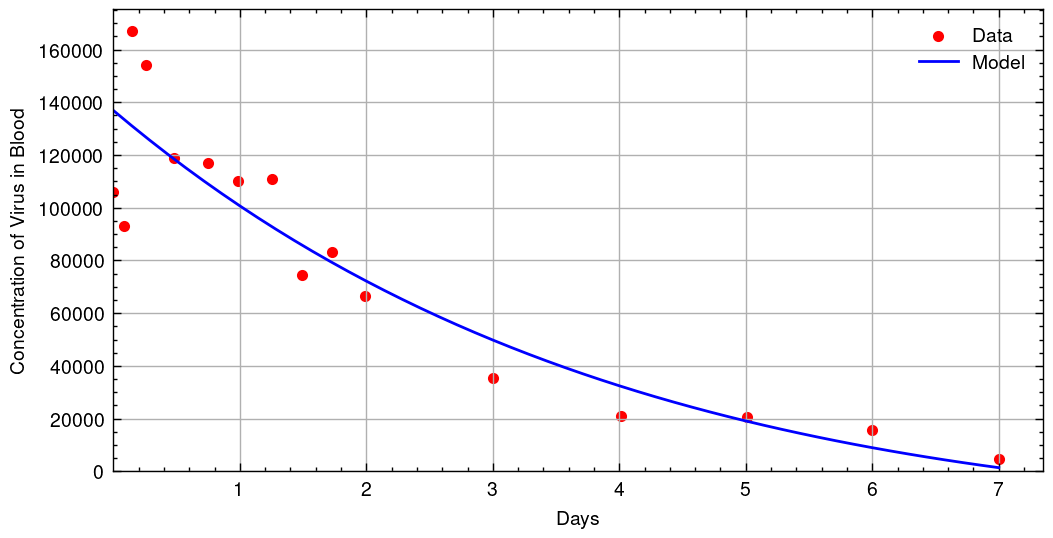

In [65]:
fig, ax = plt.subplots(1,1, figsize=(6,3), dpi=200) # creating a figure 
x_fit = np.linspace(0,7,50) # creating the x values which will be passed to the viral_load function
ax.scatter(x_exp, y_exp, color='red', label='Data') # creat a scatter plot to display the HIV data
ax.plot(x_fit, viral_load(x_fit,params[0],params[1],params[2],params[3]), color='blue', label="Model") # create a plot to display the fitted viral_load function
ax.set_xlabel("Days")  # labels the x & y axis
ax.set_ylabel("Concentration of Virus in Blood")
ax.set_xlim(0.00001) # sets the x and y axis so there is one 0 at the origian, this is purely cosmetic
ax.set_ylim(0)
plt.grid() # displays a gird on the plot
plt.legend() # displays the legend speficied by the label arguments passed through the scatter and plot functions
_=plt.show() # displays the plot

Not sure what is going on about the latency (c) question

# 5.2 BACTERIAL EXAMPLE

### Part 5.2.1 Explore the model 

Here we have two functions

$$
V(t) = 1-e^{-\tfrac{t}{\tau}} \,\,\,\,\, \& \,\,\,\,\, W(t) =  A\left(e^{-\tfrac{t}{\tau}} - 1 + \frac{t}{\tau} \right)
$$

where $A$ & $\tau$ are constant. 

The goal here is to plot $W(t)$ for a variety of values for $A$ and $\tau$. First we define our function for $W(t)$.

In [66]:
def W(t, a, tau):
    return a*(math.e**(-t/tau)-1+t/tau)

Next, we loop though different values for $A$ & $\tau$, plotting each one

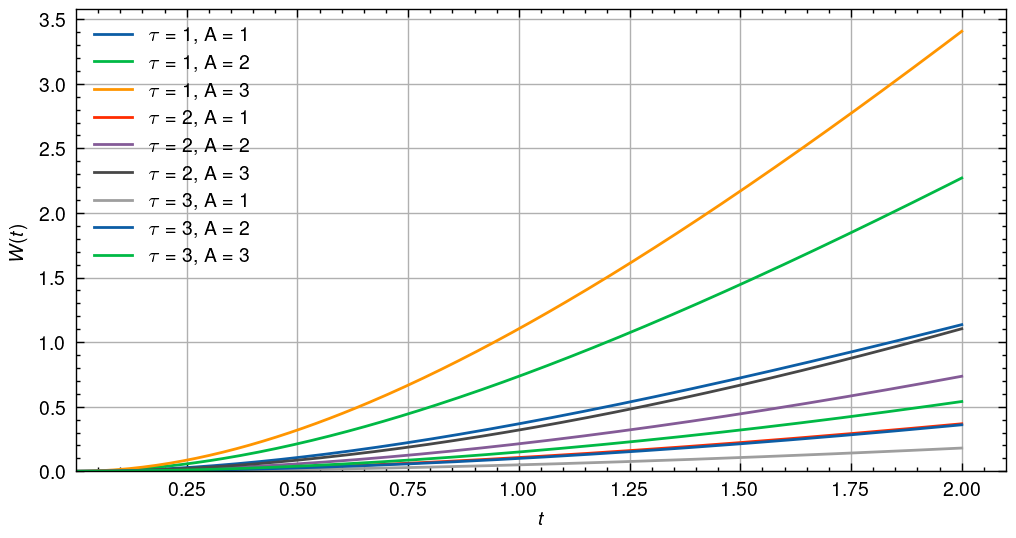

In [67]:
tau_vals = [1,2,3] # creates a list of values for tau
a_vals = [1,2,3] # creates a list of values for a
t = np.linspace(0,2,200) # creats an array of values for t, this will be the independent variable against which W will be  plotted
fig, ax = plt.subplots(1,1, figsize=(6,3), dpi=200) # creates a figure with one plot
for tau_val in tau_vals: # loops through all of the values of tau from the list tau_vals
    for a_val in a_vals: # loops through all of the values of a from the list a_vals
        ax.plot(t, W(t,a_val,tau_val), label=fr"$\tau$ = {tau_val}, A = {a_val}") # plots W as a function of t and labels it with its respective values for a and tau
ax.set_xlabel(r"$t$")  # labels the x & y axis
ax.set_ylabel(r"$W(t)$")
ax.set_xlim(0.00001) # sets the x and y axis so there is one 0 at the origian, this is purely cosmetic
ax.set_ylim(0)
plt.grid() # displays a gird on the plot
plt.legend() # displays the legend speficied by the label arguments passed through the scatter and plot functions
_=plt.show() # displays the plot

### Part 5.22 Fit experimental data

First we import our bacteria csv file and break the dataframe down into arrays for our two variables.

In [68]:
df = pd.read_csv("bacteria.csv")
x_exp, y_exp = np.array(df.x), np.array(df.y)

Next we are asked to plot the experimental data alongside the function $V(t)$. So first we define our function

In [69]:
def v(t, tau = 1):
    return 1 - math.e**(-t/tau)

We now plot this function with the data imported from the csv file. This time I did not use the scipy curve fitting function to optimize the value for $\tau$. This is because there was only one parameter so it was easy to make the function fit using a guess and check method. 

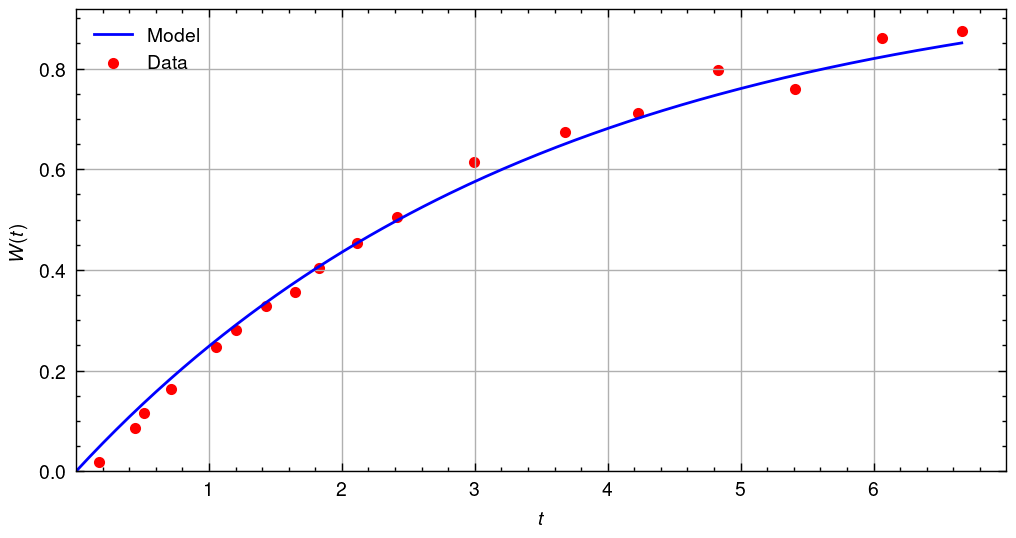

In [70]:
t = np.linspace(0,max(x_exp),200) # creats an array of values for t, this will be the independent variable against which W will be  plotted
fig, ax = plt.subplots(1,1, figsize=(6,3), dpi=200) # creates a figure with one plot
ax.plot(t, v(t,tau=3.5), color='blue', label="Model") # here the function v(t) is plotted, the parameter tau was chosen to be equal to 3.5 using guess and check method
ax.scatter(x_exp, y_exp, color='red', label="Data") # plots the experimental data 
ax.set_xlabel(r"$t$")  # labels the x & y axis
ax.set_ylabel(r"$W(t)$")
ax.set_xlim(0.00001) # sets the x and y axis so there is one 0 at the origian, this is purely cosmetic
ax.set_ylim(0)
plt.grid() # displays a gird on the plot
plt.legend() # displays the legend speficied by the label arguments passed through the scatter and plot functions
_=plt.show() # displays the plot